# Solar DocVision
Understand Solar DocVision Model 

In [1]:
! pip3 install -qU langchain-upstage requests python-dotenv datasets arize-phoenix

In [2]:
# @title set API key
from pprint import pprint
import os

import warnings

warnings.filterwarnings("ignore")

if "google.colab" in str(get_ipython()):
    # Running in Google Colab. Please set the UPSTAGE_API_KEY in the Colab Secrets
    from google.colab import userdata

    os.environ["UPSTAGE_API_KEY"] = userdata.get("UPSTAGE_API_KEY")
else:
    # Running locally. Please set the UPSTAGE_API_KEY in the .env file
    from dotenv import load_dotenv

    load_dotenv()

assert (
    "UPSTAGE_API_KEY" in os.environ
), "Please set the UPSTAGE_API_KEY environment variable"

In [3]:
from langchain_upstage import ChatUpstage as Chat

from langchain_core.output_parsers import StrOutputParser
from langchain_core.messages import HumanMessage

In [4]:
solar_docvision = Chat(model="solar-docvision")

In [5]:
# turn image to base64
import base64

img_file = "./figures/docv_example.png"
with open(img_file, "rb") as img_file:
    img_base64 = base64.b64encode(img_file.read()).decode("utf-8")

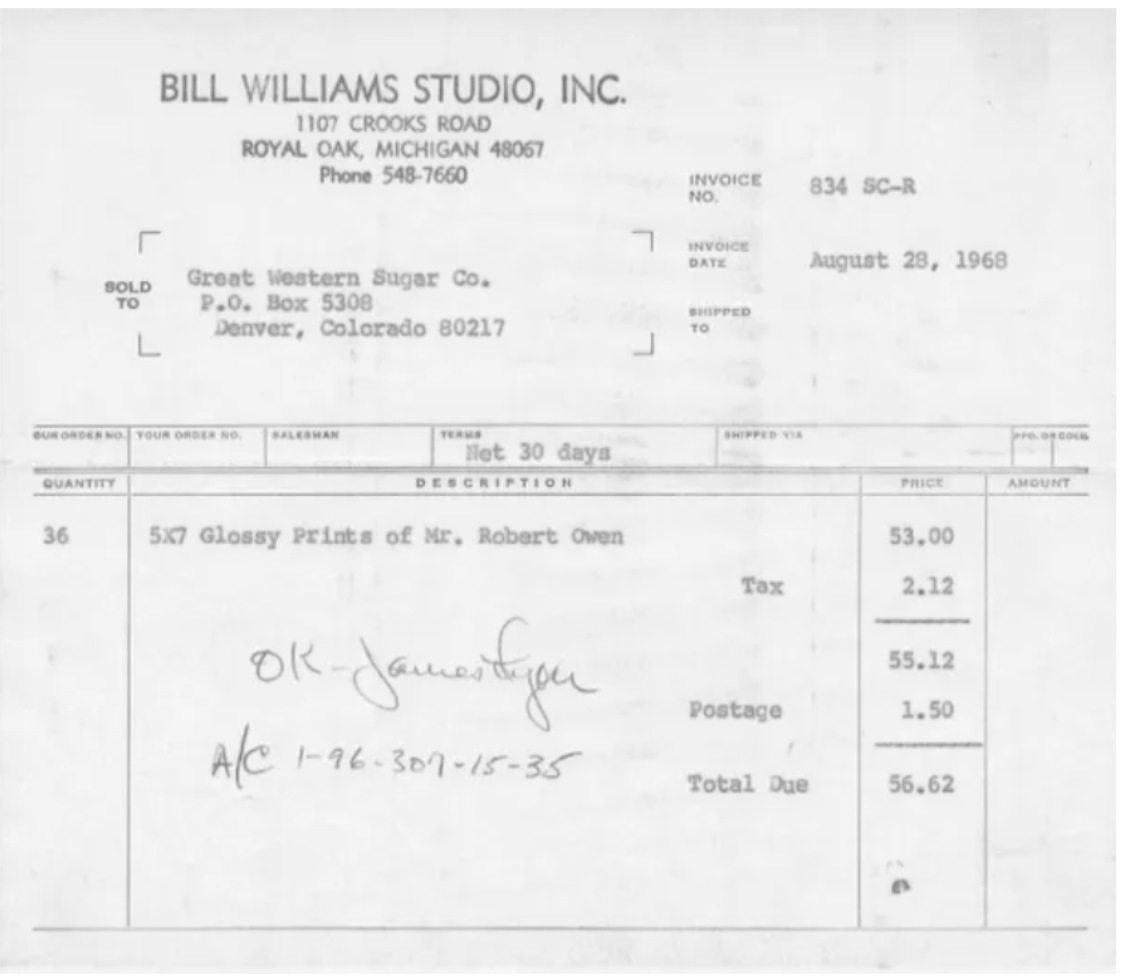

In [6]:
# Show image file using the img_base64
from IPython.display import display, Image

display(Image(data=base64.b64decode(img_base64), width=400))

In [7]:
msg = HumanMessage(
    content=[
        {"type": "text", "text": "What's the amount of total due?"},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
        },
    ],
)

In [8]:
chain = solar_docvision | StrOutputParser()
response = chain.invoke([msg])
print(response)

 56.62


